<a href="https://colab.research.google.com/github/dauphin95/data_spring/blob/master/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://xgboost.readthedocs.io/en/latest/python/python_intro.html

[0]	eval-auc:0.753648	train-auc:0.811806
[1]	eval-auc:0.756064	train-auc:0.815282
[2]	eval-auc:0.755979	train-auc:0.815175
[3]	eval-auc:0.757937	train-auc:0.819692
[4]	eval-auc:0.758699	train-auc:0.820853
[5]	eval-auc:0.758992	train-auc:0.822227
[6]	eval-auc:0.763137	train-auc:0.828509
[7]	eval-auc:0.762283	train-auc:0.829336
[8]	eval-auc:0.764294	train-auc:0.829054
[9]	eval-auc:0.765081	train-auc:0.831406
[10]	eval-auc:0.764833	train-auc:0.832334
[11]	eval-auc:0.765664	train-auc:0.833921
[12]	eval-auc:0.76597	train-auc:0.834322
[13]	eval-auc:0.766732	train-auc:0.835776
[14]	eval-auc:0.768411	train-auc:0.839042
[15]	eval-auc:0.768371	train-auc:0.839426
[16]	eval-auc:0.768564	train-auc:0.840072
[17]	eval-auc:0.769404	train-auc:0.84223
[18]	eval-auc:0.769437	train-auc:0.842856
[19]	eval-auc:0.769721	train-auc:0.843769
[20]	eval-auc:0.769633	train-auc:0.844268
[21]	eval-auc:0.770198	train-auc:0.845046
[22]	eval-auc:0.770032	train-auc:0.845286
[23]	eval-auc:0.770492	train-auc:0.845967
[24]

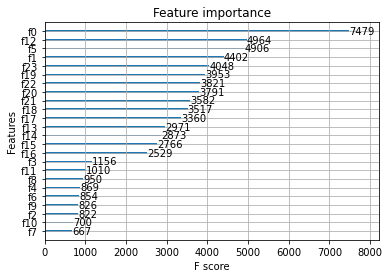

In [28]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.metrics import recall_score

df = pd.read_csv('credit_cards_dataset.csv')

##ndarry 만들기
x = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values

## test, train set설정
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 123)

## XGB DMatrix 설정
dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

## param 설정
param = {'max_depth': 10, 'eta': 0.01, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
evallist = [(dtest, 'eval'), (dtrain, 'train')]

## training
num_round = 100
bst = xgb.train(param, dtrain, num_round, evallist)
## training후 파일 저장
bst.save_model('0001.model')

## 결론 : accuracy가 num_round수를 올릴때마다 올라감, but 너무 늘릴경우 overfitting 됨
## gradian을 배워야 적정선의 num_round 수를 지정할 수 있음

## predict
ypred = bst.predict(dtest)
prediction = np.round(ypred)
##prediction을 y_test(정답)과 비교
print(recall_score(y_test, prediction))

## plotting
## f1 score을 기준으로 feature간 관련도 표시
xgb.plot_importance(bst)